import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [49]:
data = pd.read_csv('GOOG.csv', date_parser = True)
data.tail()

C:\Users\tejpa\AppData\Local\Temp\ipykernel_10220\930745223.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('GOOG.csv', date_parser = True)


,Date,Open,High,Low,Close,Adj Close,Volume
3804,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200
3808,2019-10-04,1191.890015,1211.439941,1189.170044,1209.000000,1209.000000,1021092


In [50]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [51]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [52]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3809.000000,3809.000000,3809.000000,3809.000000,3809.000000,3.809000e+03
mean,477.021219,481.312940,472.442959,476.979070,476.979070,7.181291e+06
std,325.569981,328.160631,323.008258,325.744535,325.744535,8.108893e+06
min,49.409801,50.680038,47.800831,49.818268,49.818268,7.900000e+03
25%,235.616852,238.615616,233.484848,235.517227,235.517227,1.831000e+06
50%,313.823700,316.558472,310.386597,313.290710,313.290710,4.492500e+06
75%,703.619995,711.478027,695.719971,704.239990,704.239990,9.330100e+06
max,1274.000000,1289.270020,1266.295044,1287.579956,1287.579956,8.254150e+07


In [53]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

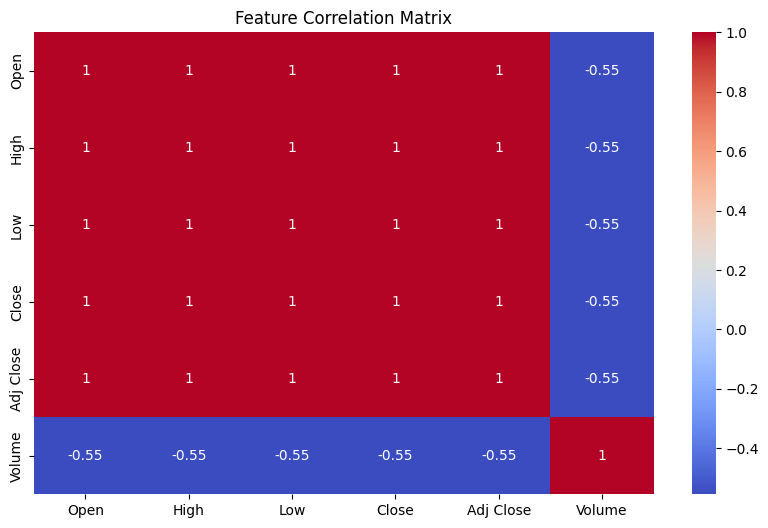

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns like 'Date'
numeric_data = data.drop(columns=['Date'])

# Plot correlation matrix
plt.figure(figsize=(10,6))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [71]:
data_training = data[data['Date']<'2019-01-01'].copy()
data_test = data[data['Date']>='2019-01-01'].copy()

In [56]:
print(data_training.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [57]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [58]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[3.30294890e-04, 9.44785459e-04, 0.00000000e+00, 1.34908021e-04,
        5.43577404e-01],
       [7.42148227e-04, 2.98909923e-03, 1.88269054e-03, 3.39307537e-03,
        2.77885613e-01],
       [4.71386886e-03, 4.78092896e-03, 5.42828241e-03, 3.83867225e-03,
        2.22150736e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.90196475e-01, 8.15799920e-01,
        2.54672037e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20249255e-01, 8.10219301e-01,
        1.70463908e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12332341e-01, 8.09012935e-01,
        1.79975186e-02]])

In [59]:
# create RNN with 60 timesteps, i.e. look 60 previous time steps
X_train = []
y_train = []
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

In [60]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [61]:
X_train.shape

(3557, 60, 5)

In [62]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
regressor = Sequential()

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

c:\Users\tejpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
regressor.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_8 (SimpleRNN)        │ (None, 60, 50)         │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_9 (SimpleRNN)        │ (None, 60, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_10 (SimpleRNN)       │ (None, 60, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_11 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,001 (70.32 KB)

 Trainable params: 18,001 (70.32 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [44]:
#test data preparation
data_test.head()

,Date,Open,High,Low,Close,Volume
40,3/1/2012,309.97,311.68,307.92,620.7,"4,492,000"
41,3/2/2012,309.84,310.83,309.00,619.55,"3,158,300"
42,3/5/2012,309.06,310.08,304.55,612.57,"3,198,400"
43,3/6/2012,302.89,303.27,295.81,603.3,"6,372,500"
44,3/7/2012,303.39,304.45,301.80,605.14,"2,538,400"


In [45]:
data_training.tail(60)

,Open,High,Low,Volume
455,0.929221,0.931764,0.943503,0.022228
456,0.930461,0.930218,0.934360,0.016605
457,0.926798,0.948540,0.944133,0.026490
458,0.943610,0.954007,0.953123,0.034572
459,0.938162,0.946184,0.955947,0.016777
460,0.933391,0.933159,0.938655,0.034277
461,0.934199,0.938305,0.944381,0.013304
462,0.930724,0.941886,0.947244,0.023140
463,0.945845,0.971593,0.962647,0.062563
464,0.965362,0.977229,0.986429,0.050698


In [65]:
# Then train
regressor.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.4899
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2036
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0935
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0587
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0411
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0288
Epoch 7/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0235
Epoch 8/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0173
Epoch 9/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0126
Epoch 10/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0109
Epoch 11/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0097
Epoch 12/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0081
Epoch 13/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0059
Epoch 14/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0058
Epoch 15/100
112/112 ━━━━━━━━

In [68]:
#test data preparation
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [72]:
past_60_days = data_training.tail(60)
df = pd.concat([past_60_days, data_test], ignore_index=True)
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [73]:
inputs = scaler.transform(df)
inputs

array([[0.93805611, 0.93755773, 0.92220906, 0.91781776, 0.0266752 ],
       [0.91527437, 0.91792904, 0.91350452, 0.90892169, 0.01425359],
       [0.90103881, 0.91343268, 0.89872289, 0.90204445, 0.02331778],
       ...,
       [0.93940683, 0.93712442, 0.93529076, 0.9247443 , 0.01947328],
       [0.92550693, 0.93064972, 0.92791493, 0.9339358 , 0.01954719],
       [0.93524016, 0.94894575, 0.95017564, 0.95130949, 0.01227612]])

In [74]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [75]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((192, 60, 5), (192,))

In [76]:
y_pred = regressor.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [77]:
y_test

array([0.7917223 , 0.81172082, 0.80483632, 0.83668828, 0.84046203,
       0.84499714, 0.83354486, 0.82987753, 0.816567  , 0.81922747,
       0.84364642, 0.84321254, 0.86001852, 0.85019526, 0.8414771 ,
       0.84076491, 0.84773945, 0.84373646, 0.83765428, 0.8341752 ,
       0.86247434, 0.87016925, 0.87038209, 0.88035265, 0.89241068,
       0.86342395, 0.84937666, 0.85752174, 0.86558508, 0.88047546,
       0.87479439, 0.88464213, 0.86820457, 0.87638243, 0.86889218,
       0.86075529, 0.87311621, 0.8647255 , 0.86570779, 0.8692688 ,
       0.88040181, 0.89848477, 0.90099794, 0.91117315, 0.90563118,
       0.88189982, 0.89640548, 0.92408257, 0.94240705, 0.9373849 ,
       0.93645987, 0.92820837, 0.93271889, 0.93970971, 0.95497672,
       0.96342468, 0.93936596, 0.94067571, 0.93000926, 0.91858157,
       0.92133207, 0.92886319, 0.93804792, 0.94800219, 0.9467415 ,
       0.95414992, 0.94833784, 0.93860462, 0.94243573, 0.94512068,
       0.95006509, 0.95661393, 0.96234416, 0.96889301, 0.97395

In [78]:
scaler.scale_

array([8.18605127e-04, 8.17521128e-04, 8.32487534e-04, 8.20673293e-04,
       1.21162775e-08])

In [79]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [80]:
y_pred = y_pred*scale
y_test = y_test*scale

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Inverse transform to get actual price values
predicted_prices = y_pred
actual_prices = y_test.reshape(-1, 1)

# Performance metrics
mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = math.sqrt(mse)
r2 = r2_score(actual_prices, predicted_prices)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 20.8399
Mean Squared Error (MSE): 738.5303
Root Mean Squared Error (RMSE): 27.1759
R² Score: 0.7680


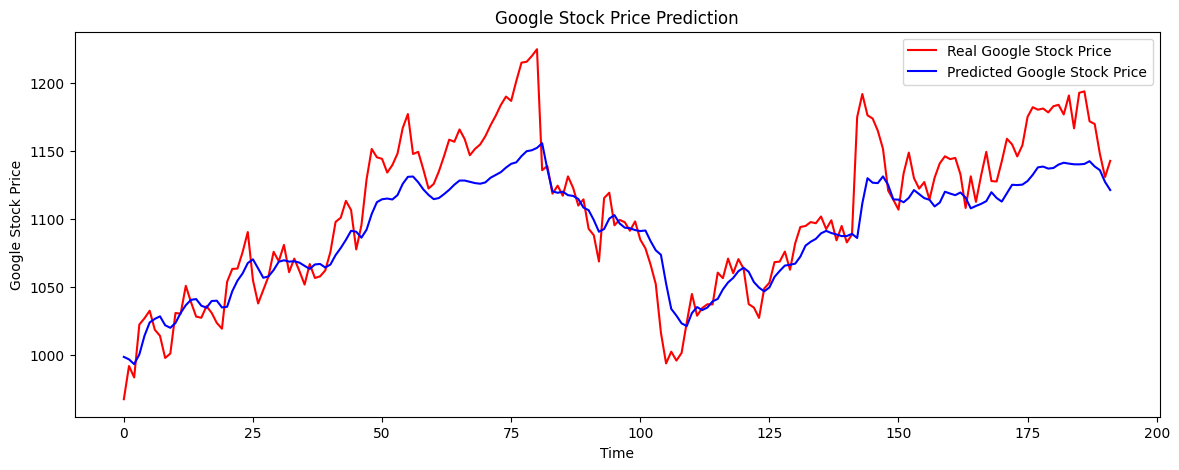

In [82]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()